# Documentação do Código


Este script realiza uma análise preditiva do desempenho estrutural com base em dados simulados.
Utiliza um modelo de regressão linear para prever o desempenho com base em duas variáveis de entrada:
'Resistencia_Material' e 'Carga_Aplicada'.

Passos do Código:
1. Importação de bibliotecas necessárias para análise de dados e visualização.
2. Configuração do estilo do Seaborn para gráficos mais atraentes.
3. Estimação de cargas para diferentes tipos de materiais com base em cálculos aproximados.
4. Geração de dados de treinamento aleatórios usando numpy e pandas.
5. Divisão dos dados em conjuntos de treinamento e teste.
6. Treinamento de um modelo de regressão linear utilizando a biblioteca scikit-learn.
7. Realização de previsões no conjunto de teste.
8. Avaliação do desempenho do modelo utilizando métricas como R², MAE e MSE.
9. Visualização dos resultados por meio de gráficos de dispersão utilizando Seaborn.




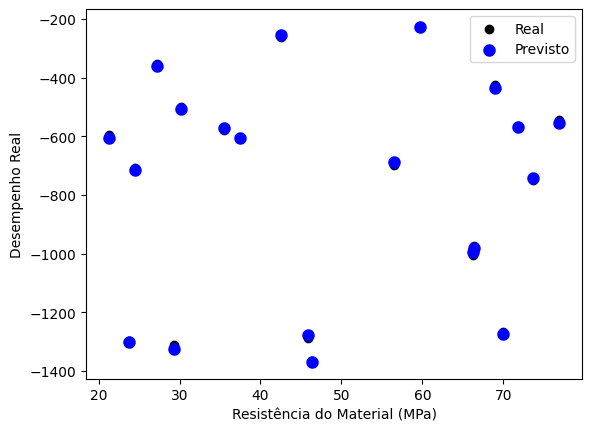

R²: 1.00
MAE: 7.33
MSE: 66.64


In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Gerar dados sintéticos para o exemplo
np.random.seed(42)  # Define a semente para garantir reprodutibilidade dos resultados
dados = pd.DataFrame({
    'Resistencia_Material': np.random.uniform(20, 80, 100),  # Gera 100 valores aleatórios entre 20 e 80
    'Carga_Aplicada': np.random.uniform(100, 500, 100),  # Gera 100 valores aleatórios entre 100 e 500
})

# Adicionar variabilidade para simular o desempenho real
dados['Desempenho_Real'] = 2 * dados['Resistencia_Material'] - 3 * dados['Carga_Aplicada'] + np.random.normal(0, 10, 100)

# Dividir os dados em conjuntos de treinamento e teste
X = dados[['Resistencia_Material', 'Carga_Aplicada']]
y = dados['Desempenho_Real']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar o desempenho do modelo
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Visualizar os resultados
plt.scatter(X_test['Resistencia_Material'], y_test, color='black', label='Real')
plt.scatter(X_test['Resistencia_Material'], y_pred, color='blue', linewidth=3, label='Previsto')
plt.xlabel('Resistência do Material (MPa)')
plt.ylabel('Desempenho Real')
plt.legend()
plt.show()

# Imprimir métricas de avaliação
print(f'R²: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')


In [2]:
# Carga total estimada (já calculada anteriormente, Shopping Rio Mar do recife 101 000 m²(ABL))
carga_total = 71863420  # Carga total  = carga de piso + carga nas paredes + carga no teto

# Calculando as cargas para cada tipo de material
carga_concreto_armado = 0.6 * carga_total
carga_concreto_protendido = 0.2 * carga_total
carga_estrutura_metalica = 0.2 * carga_total

# Exibindo os resultados
print(f'Carga de Concreto Armado: {carga_concreto_armado:.2f} kg')
print(f'Carga de Concreto Protendido: {carga_concreto_protendido:.2f} kg')
print(f'Carga de Estrutura Metálica: {carga_estrutura_metalica:.2f} kg')


Carga de Concreto Armado: 43118052.00 kg
Carga de Concreto Protendido: 14372684.00 kg
Carga de Estrutura Metálica: 14372684.00 kg


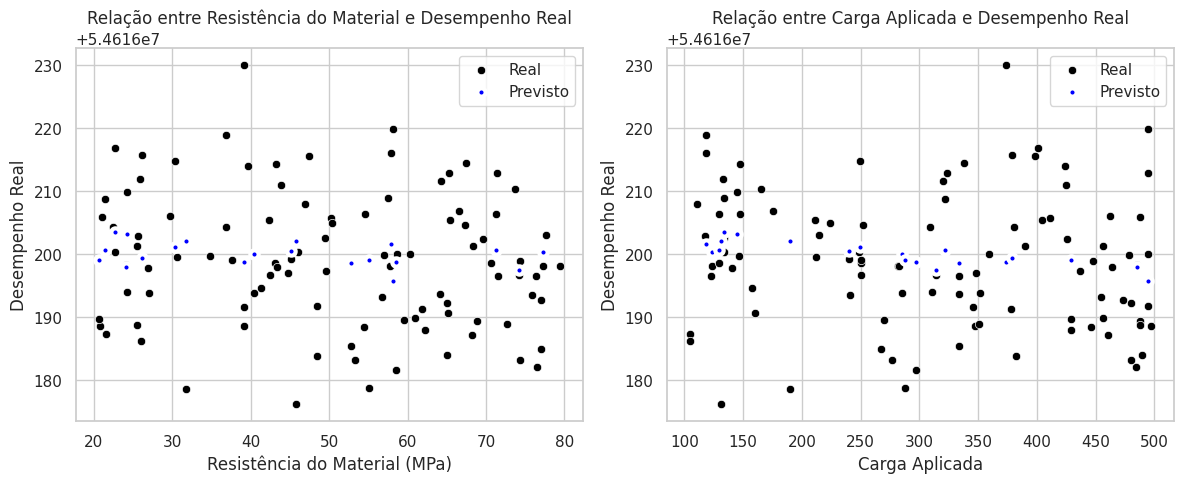

R²: -0.04
MAE: 12.16
MSE: 230.12


In [3]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Configuração do estilo do Seaborn
sns.set(style="whitegrid")

# Cargas estimadas com base nos cálculos aproximados
carga_total = 71863420
carga_concreto_armado = 0.6 * carga_total
carga_concreto_protendido = 0.2 * carga_total
carga_estrutura_metalica = 0.2 * carga_total

# Criar um DataFrame com base nas cargas estimadas
dados_treinamento = pd.DataFrame({
    'Resistencia_Material': np.random.uniform(20, 80, 100),
    'Carga_Aplicada': np.random.uniform(100, 500, 100),
    'Desempenho_Real': (
        2 * carga_concreto_armado * 0.6 -
        3 * carga_concreto_protendido * 0.2 +
        4 * carga_estrutura_metalica * 0.2 +
        np.random.normal(0, 10, 100)
    )
})

# Dividir os dados em conjuntos de treinamento e teste
X_treino = dados_treinamento[['Resistencia_Material', 'Carga_Aplicada']]
y_treino = dados_treinamento['Desempenho_Real']
X_treino, X_teste, y_treino, y_teste = train_test_split(X_treino, y_treino, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliar o desempenho do modelo
r2 = metrics.r2_score(y_teste, y_pred)
mae = metrics.mean_absolute_error(y_teste, y_pred)
mse = metrics.mean_squared_error(y_teste, y_pred)

# Visualizar os resultados com Seaborn
plt.figure(figsize=(12, 5))

# Gráfico de dispersão para variável de entrada vs. variável de saída
plt.subplot(1, 2, 1)
sns.scatterplot(x='Resistencia_Material', y='Desempenho_Real', data=dados_treinamento, color='black', label='Real')
sns.scatterplot(x='Resistencia_Material', y=y_pred, data=pd.concat([X_teste, y_teste], axis=1), color='blue', linewidth=3, label='Previsto')
plt.xlabel('Resistência do Material (MPa)')
plt.ylabel('Desempenho Real')
plt.title('Relação entre Resistência do Material e Desempenho Real')
plt.legend()

# Gráfico de dispersão para outra variável de entrada vs. variável de saída
plt.subplot(1, 2, 2)
sns.scatterplot(x='Carga_Aplicada', y='Desempenho_Real', data=dados_treinamento, color='black', label='Real')
sns.scatterplot(x='Carga_Aplicada', y=y_pred, data=pd.concat([X_teste, y_teste], axis=1), color='blue', linewidth=3, label='Previsto')
plt.xlabel('Carga Aplicada')
plt.ylabel('Desempenho Real')
plt.title('Relação entre Carga Aplicada e Desempenho Real')
plt.legend()

plt.tight_layout()
plt.show()


# Imprimir métricas de avaliação
print(f'R²: {r2:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')

<ipython-input-4-d5920e5cb44e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Metrica', y='Valor', data=metricas_df, palette='viridis')


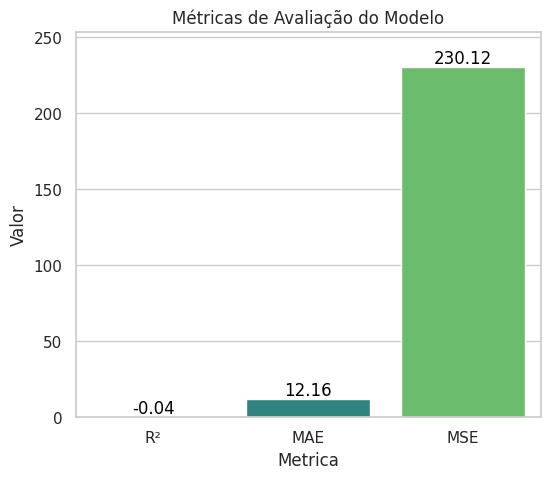

In [4]:
metricas_df = pd.DataFrame({'Metrica': ['R²', 'MAE', 'MSE'],
                             'Valor': [r2, mae, mse]})

plt.figure(figsize=(6, 5))
barplot = sns.barplot(x='Metrica', y='Valor', data=metricas_df, palette='viridis')

# Adicionar anotações aos valores das barras
for index, row in metricas_df.iterrows():
    barplot.text(index, row['Valor'] + 0.01 * max(metricas_df['Valor']), f'{row["Valor"]:.2f}', color='black', ha="center")

plt.title('Métricas de Avaliação do Modelo')
plt.ylim(0, max(metricas_df['Valor']) + 0.1 * max(metricas_df['Valor']))
plt.show()